## Importing Liabraries

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pylab import rcParams

## Loading Data

In [69]:
data = pd.read_csv('BreadBasket_DMS.csv')

In [70]:
data.head(10)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
5,2016-10-30,10:07:57,3,Cookies
6,2016-10-30,10:08:41,4,Muffin
7,2016-10-30,10:13:03,5,Coffee
8,2016-10-30,10:13:03,5,Pastry
9,2016-10-30,10:13:03,5,Bread


In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


## Pre-Processing

<font color = 'red'> Here we can see the 'B' in bread is capital and that might can disturb in programing further se lowering is a good option

In [72]:
data['Item'] = data['Item'].str.lower()

In [73]:
#counting the NULL values

(data['Item']=='none').value_counts()

False    20507
True       786
Name: Item, dtype: int64

<font color='blue'> From here we can see that there are 786 entries that have NULL value present
    <br>
So Droping the NULL values

In [74]:
data = data.drop(data[data.Item=='none'].index)

In [75]:
data.head(20)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,bread
1,2016-10-30,10:05:34,2,scandinavian
2,2016-10-30,10:05:34,2,scandinavian
3,2016-10-30,10:07:57,3,hot chocolate
4,2016-10-30,10:07:57,3,jam
5,2016-10-30,10:07:57,3,cookies
6,2016-10-30,10:08:41,4,muffin
7,2016-10-30,10:13:03,5,coffee
8,2016-10-30,10:13:03,5,pastry
9,2016-10-30,10:13:03,5,bread


#### Item Exploration

In [76]:
data['Item'].nunique()

94

<font color='blue'> Hence there are 94 unique items in the dataset


In [77]:
#seeing the unique values of items column

data['Item'].unique()

array(['bread', 'scandinavian', 'hot chocolate', 'jam', 'cookies',
       'muffin', 'coffee', 'pastry', 'medialuna', 'tea', 'tartine',
       'basket', 'mineral water', 'farm house', 'fudge', 'juice',
       "ella's kitchen pouches", 'victorian sponge', 'frittata',
       'hearty & seasonal', 'soup', 'pick and mix bowls', 'smoothies',
       'cake', 'mighty protein', 'chicken sand', 'coke',
       'my-5 fruit shoot', 'focaccia', 'sandwich', 'alfajores', 'eggs',
       'brownie', 'dulce de leche', 'honey', 'the bart', 'granola',
       'fairy doors', 'empanadas', 'keeping it local', 'art tray',
       'bowl nic pitt', 'bread pudding', 'adjustment', 'truffles',
       'chimichurri oil', 'bacon', 'spread', 'kids biscuit', 'siblings',
       'caramel bites', 'jammie dodgers', 'tiffin', 'olum & polenta',
       'polenta', 'the nomad', 'hack the stack', 'bakewell',
       'lemon and coconut', 'toast', 'scone', 'crepes', 'vegan mincepie',
       'bare popcorn', 'muesli', 'crisps', 'pintxos', 

<font color='blue'> We will have to find association b/w these 94 values

In [78]:
#checking total item being purchased

data['Item'].count()

20507

In [79]:
#checking items were sold and purchased by the customer most

data.groupby('Item').size().sort_values(ascending=False).head(20)

Item
coffee           5471
bread            3325
tea              1435
cake             1025
pastry            856
sandwich          771
medialuna         616
hot chocolate     590
cookies           540
brownie           379
farm house        374
muffin            370
juice             369
alfajores         369
soup              342
scone             327
toast             318
scandinavian      277
truffles          193
coke              185
dtype: int64

#### Visualizing this on graph

<AxesSubplot:xlabel='Item'>

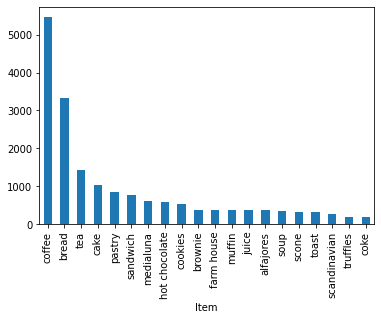

In [80]:
#checking items were sold and purchased by the customer most

data.groupby('Item').size().sort_values(ascending=False).head(20).plot(kind = 'bar')

<font color ='green'> <b>To understand Data working we will :-</b>
    <br> We will make Transaction as Row and will Sum-up all these items sold

In [81]:
combined_data = pd.DataFrame({'items' : data.groupby('Transaction')['Item'].unique(),
                              'items_count' : data.groupby('Transaction')['Item'].nunique()})

combined_data.reset_index(inplace= True)
combined_data.head(10)

,Transaction,items,items_count
0,1,[bread],1
1,2,[scandinavian],1
2,3,"[hot chocolate, jam, cookies]",3
3,4,[muffin],1
4,5,"[coffee, pastry, bread]",3
5,6,"[medialuna, pastry, muffin]",3
6,7,"[medialuna, pastry, coffee, tea]",4
7,8,"[pastry, bread]",2
8,9,"[bread, muffin]",2
9,10,"[scandinavian, medialuna]",2


## DATE Exploration

In [82]:
data['Date'].min()

'2016-10-30'

In [83]:
data['Date'].max()

'2017-04-09'

In [84]:
## total no. of days in dataset

data['Date'].nunique()

159

# <font color= 'green'> Building Up Apriori Algorithm

In [85]:
from mlxtend.frequent_patterns import apriori, association_rules

## Transforming Data

<font color = 'blue'> Making items as columns and each transaction as a row and count some item bought in one transaction

In [86]:
dt = data.groupby(['Transaction','Item'])['Item'].count()
dt.head(20)

Transaction  Item         
1            bread            1
2            scandinavian     2
3            cookies          1
             hot chocolate    1
             jam              1
4            muffin           1
5            bread            1
             coffee           1
             pastry           1
6            medialuna        1
             muffin           1
             pastry           1
7            coffee           1
             medialuna        1
             pastry           1
             tea              1
8            bread            1
             pastry           1
9            bread            1
             muffin           1
Name: Item, dtype: int64

<font color = 'blue'> Now Creating the vector form of the data

In [87]:
dt = dt.unstack()
dt.head(10)

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<font color = 'blue'> NaN changes to 1 when data exist for that row and column and rest will goes 0

In [88]:
dt=dt.reset_index().set_index('Transaction')
dt.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<font color = 'blue'> changing whole NaN to 0 to make use it in future by making 1 where required

In [89]:
dt = dt.fillna(0)
dt.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<font color = 'blue'> Now finally we are good to go 
<br>
Encoding data as 1 where we have the item for transaction
<br>

For doing so we need a function 

In [90]:
def encode_units(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

In [91]:
dt = dt.applymap(encode_units)
dt.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## <font color ='green'> Applying Algo to data

In [92]:
frequent_items = apriori(dt,min_support= 0.01, use_colnames= True)

<font color = 'red' > Now we have the SuperSets with us and now we can apply and find all the 5 metrix

#### Applying Association

In [93]:
rules = association_rules(frequent_items,metric='lift',min_threshold= 1)
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
1,(coffee),(alfajores),0.478394,0.036344,0.019651,0.041078,1.130235,0.002264,1.004936
2,(bread),(pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306
3,(pastry),(bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305
4,(brownie),(coffee),0.040042,0.478394,0.019651,0.490765,1.025860,0.000495,1.024293
5,(coffee),(brownie),0.478394,0.040042,0.019651,0.041078,1.025860,0.000495,1.001080
6,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
7,(coffee),(cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905
8,(cake),(hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910
9,(hot chocolate),(cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125


We are done now 

we can see

--> Rules where confidence is >=50%

In [95]:
rules[(rules['lift'] >=1 & (rules['confidence'] >=0.5 ))]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
1,(coffee),(alfajores),0.478394,0.036344,0.019651,0.041078,1.130235,0.002264,1.004936
2,(bread),(pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306
3,(pastry),(bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305
4,(brownie),(coffee),0.040042,0.478394,0.019651,0.490765,1.025860,0.000495,1.024293
5,(coffee),(brownie),0.478394,0.040042,0.019651,0.041078,1.025860,0.000495,1.001080
6,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
7,(coffee),(cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905
8,(cake),(hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910
9,(hot chocolate),(cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125


### Understanding 

for result 30 

A = tost , C = coffe

from entery 30 we can see tost and cofee are commonly bought together 

support = 0.023666

confidence = 0.704403 ,,,,i.e - 70.44% of all the tost transaction contains coffe
   
lift = 1.472431 , therefore - coffe is 1.47 times more likely to be bought by the customer who buy tost